In [ ]:
!pip install scikit-learn -U

In [ ]:
to_train = pd.read_csv('/content/spb_df (2).csv')

In [ ]:
to_train

,time,address,floor_,floors,area,price,lat,lng,material,is_new,closest_station,dist_to_station,rooms,updated,address_type
0,168237739,санкт-петербург,4,11,33.3,9600000,59.919100,30.361680,NaN,True,Лиговский проспект,0.760264,1,2022-11-27 15:38:03,другое
1,168237356,санкт-петербург приморский просп. 62к1,3,13,56.0,26000000,59.981767,30.224943,монолитный,False,Зенит,1.816791,2,2022-11-27 15:23:02,просп.
2,168237165,санкт-петербург курортный район сестрорецк ул....,3,12,47.0,9500000,60.090876,29.956650,кирпичный,False,Беговая,29.641888,1,2022-11-27 15:11:02,ул.
3,168236798,санкт-петербург замшина ул. 31к3,7,9,62.0,9750000,59.980254,30.410649,панельный,False,Академическая,3.964252,3,2022-11-27 14:53:03,ул.
4,168236015,санкт-петербург красное село гатчинское ш. 13к3,4,5,29.7,3950000,59.719048,30.077080,блочный,False,Проспект Ветеранов,23.635421,1,2022-11-27 14:16:02,ш.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22112,149249177,санкт-петербург дальневосточный просп. 33к1,10,20,27.0,5800000,59.899246,30.458220,кирпичный,False,Проспект Большевиков,2.476833,0,2022-08-27 23:43:01,просп.
22113,149056396,санкт-петербург коломяжский просп. 20,5,13,44.6,13700000,59.998774,30.298324,NaN,False,Пионерская,0.447705,1,2022-08-29 07:19:02,просп.
22114,148874724,санкт-петербург,4,10,70.3,25290000,59.957550,30.245350,NaN,True,Приморская,1.570945,2,2022-08-29 21:27:05,другое
22115,148851865,санкт-петербург пос. парголово просп. энгельса...,6,17,22.8,4000000,60.071440,30.342950,NaN,True,Парнас,1.126630,0,2022-08-27 07:58:03,просп.


In [ ]:
spb_df = to_train
spb_df = spb_df[spb_df.price>10000]
X, y = spb_df.drop(columns=['price', 'address', 'material', 'time']), spb_df['price']
X['updated'] = pd.to_datetime(X['updated']).astype('int64') // 10 ** 9

X['rooms'] = X['rooms'].replace("4+", "4")
X['rooms'] = X['rooms'].astype(int)
# X = pd.get_dummies(X, drop_first=True, dtype = int)

In [ ]:
X['price'] = y

In [ ]:
X

,floor_,floors,area,lat,lng,is_new,closest_station,dist_to_station,rooms,updated,address_type,price
0,4,11,33.3,59.919100,30.361680,True,Лиговский проспект,0.760264,1,1669563483,другое,9600000
1,3,13,56.0,59.981767,30.224943,False,Зенит,1.816791,2,1669562582,просп.,26000000
2,3,12,47.0,60.090876,29.956650,False,Беговая,29.641888,1,1669561862,ул.,9500000
3,7,9,62.0,59.980254,30.410649,False,Академическая,3.964252,3,1669560783,ул.,9750000
4,4,5,29.7,59.719048,30.077080,False,Проспект Ветеранов,23.635421,1,1669558562,ш.,3950000
...,...,...,...,...,...,...,...,...,...,...,...,...
22112,10,20,27.0,59.899246,30.458220,False,Проспект Большевиков,2.476833,0,1661643781,просп.,5800000
22113,5,13,44.6,59.998774,30.298324,False,Пионерская,0.447705,1,1661757542,просп.,13700000
22114,4,10,70.3,59.957550,30.245350,True,Приморская,1.570945,2,1661808425,другое,25290000
22115,6,17,22.8,60.071440,30.342950,True,Парнас,1.126630,0,1661587083,просп.,4000000


In [ ]:
spb_df.drop(columns=['material', 'address', 'time'])

,floor_,floors,area,price,lat,lng,is_new,closest_station,dist_to_station,rooms,updated,address_type
0,4,11,33.3,9600000,59.919100,30.361680,True,Лиговский проспект,0.760264,1,2022-11-27 15:38:03,другое
1,3,13,56.0,26000000,59.981767,30.224943,False,Зенит,1.816791,2,2022-11-27 15:23:02,просп.
2,3,12,47.0,9500000,60.090876,29.956650,False,Беговая,29.641888,1,2022-11-27 15:11:02,ул.
3,7,9,62.0,9750000,59.980254,30.410649,False,Академическая,3.964252,3,2022-11-27 14:53:03,ул.
4,4,5,29.7,3950000,59.719048,30.077080,False,Проспект Ветеранов,23.635421,1,2022-11-27 14:16:02,ш.
...,...,...,...,...,...,...,...,...,...,...,...,...
22112,10,20,27.0,5800000,59.899246,30.458220,False,Проспект Большевиков,2.476833,0,2022-08-27 23:43:01,просп.
22113,5,13,44.6,13700000,59.998774,30.298324,False,Пионерская,0.447705,1,2022-08-29 07:19:02,просп.
22114,4,10,70.3,25290000,59.957550,30.245350,True,Приморская,1.570945,2,2022-08-29 21:27:05,другое
22115,6,17,22.8,4000000,60.071440,30.342950,True,Парнас,1.126630,0,2022-08-27 07:58:03,просп.


In [ ]:
to_train == X

ValueError: ignored

In [ ]:
X

,floor_,floors,area,lat,lng,is_new,dist_to_station,rooms,updated,0,...,71,72,73,74,75,76,77,78,79,80
0,4,11,33.3,59.919100,30.361680,True,0.760264,1,1669563483,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,13,56.0,59.981767,30.224943,False,1.816791,2,1669562582,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,12,47.0,60.090876,29.956650,False,29.641888,1,1669561862,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,7,9,62.0,59.980254,30.410649,False,3.964252,3,1669560783,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,5,29.7,59.719048,30.077080,False,23.635421,1,1669558562,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22096,10,20,27.0,59.899246,30.458220,False,2.476833,0,1661643781,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22097,5,13,44.6,59.998774,30.298324,False,0.447705,1,1661757542,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22098,4,10,70.3,59.957550,30.245350,True,1.570945,2,1661808425,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22099,6,17,22.8,60.071440,30.342950,True,1.126630,0,1661587083,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), test_size=0.2, random_state=42)
params = {'n_estimators': 369, 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 2}
clf = RandomForestRegressor(random_state=42, **params)
clf.fit(X_train, y_train)

scores = mean_absolute_percentage_error(np.exp(y_test), np.exp(clf.predict(X_test)))
print(scores)

0.7021127097592365


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
spb_df = pd.read_csv('/content/drive/MyDrive/gazprom/spb_df.csv')

In [ ]:
X, y = spb_df.drop(columns=['price', 'address', 'material', 'time']), spb_df['price']

In [ ]:
X.to_csv('to_learn.csv', index=False)

In [ ]:
X['updated'] = pd.to_datetime(X['updated']).astype(int) // 10 ** 9
X

,floor_,floors,area,lat,lng,is_new,closest_station,dist_to_station,rooms,updated,address_type
0,4,11,33.3,59.919100,30.361680,True,Лиговский проспект,0.760264,1,1669563483,другое
1,3,13,56.0,59.981767,30.224943,False,Зенит,1.816791,2,1669562582,просп.
2,3,12,47.0,60.090876,29.956650,False,Беговая,29.641888,1,1669561862,ул.
3,7,9,62.0,59.980254,30.410649,False,Академическая,3.964252,3,1669560783,ул.
4,4,5,29.7,59.719048,30.077080,False,Проспект Ветеранов,23.635421,1,1669558562,ш.
...,...,...,...,...,...,...,...,...,...,...,...
22096,10,20,27.0,59.899246,30.458220,False,Проспект Большевиков,2.476833,0,1661643781,просп.
22097,5,13,44.6,59.998774,30.298324,False,Пионерская,0.447705,1,1661757542,просп.
22098,4,10,70.3,59.957550,30.245350,True,Приморская,1.570945,2,1661808425,другое
22099,6,17,22.8,60.071440,30.342950,True,Парнас,1.126630,0,1661587083,просп.


In [ ]:
!pip install pickle-mixin -U

  Preparing metadata (setup.py) ... done
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5991 sha256=8e14c96baa4d5701885704c4e3b71bcb6957d4061001f1d6db9fa4adbbea966d
  Stored in directory: /root/.cache/pip/wheels/3e/c6/e9/d1b0a34e1efc6c3ec9c086623972c6de6317faddb2af0a619c
Successfully built pickle-mixin


In [ ]:
!pip install pickle -U

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [ ]:
import pickle
pickle.dump(encoder, open('encoder.pickle', 'wb'))

In [ ]:
spb_df.duplicated().sum()

90

In [ ]:
from joblib import dump, load
# encoder = load('encoder.joblib')
dump(encoder, 'encoder.joblib')

OneHotEncoder(sparse_output=False)

In [ ]:
X.to_csv('result.csv', index=False)
X

,floor_,floors,area,lat,lng,is_new,closest_station,dist_to_station,rooms,updated,address_type
0,4,11,33.3,59.919100,30.361680,True,Лиговский проспект,0.760264,1,1669563483,другое
1,3,13,56.0,59.981767,30.224943,False,Зенит,1.816791,2,1669562582,просп.
2,3,12,47.0,60.090876,29.956650,False,Беговая,29.641888,1,1669561862,ул.
3,7,9,62.0,59.980254,30.410649,False,Академическая,3.964252,3,1669560783,ул.
4,4,5,29.7,59.719048,30.077080,False,Проспект Ветеранов,23.635421,1,1669558562,ш.
...,...,...,...,...,...,...,...,...,...,...,...
22096,10,20,27.0,59.899246,30.458220,False,Проспект Большевиков,2.476833,0,1661643781,просп.
22097,5,13,44.6,59.998774,30.298324,False,Пионерская,0.447705,1,1661757542,просп.
22098,4,10,70.3,59.957550,30.245350,True,Приморская,1.570945,2,1661808425,другое
22099,6,17,22.8,60.071440,30.342950,True,Парнас,1.126630,0,1661587083,просп.


In [ ]:
from sklearn.preprocessing import OneHotEncoder


spb_df = pd.read_csv('/content/drive/MyDrive/gazprom/spb_df.csv')

X, y = spb_df.drop(columns=['price', 'address', 'material', 'time']), spb_df['price']
X['updated'] = pd.to_datetime(X['updated']).astype(int) // 10 ** 9

encoder = OneHotEncoder(sparse_output=False)
encoder.fit(X[['closest_station', 'address_type']])
res = encoder.transform(X[['closest_station', 'address_type']])


X = pd.concat([X.drop(columns=['closest_station', 'address_type']), pd.DataFrame(res)], axis=1)

res = []

for column in X.columns:
    if type(column) == int:
        res.append(str(column))
    else:
        res.append(column)

X.columns = res

X['rooms'] = X['rooms'].astype(int)

y = np.log(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# params = {'n_estimators': 369, 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 2}
# clf = RandomForestRegressor(random_state=42, **params)
# clf.fit(X_train, y_train)

# scores = mean_absolute_percentage_error(np.exp(y_test), np.exp(clf.predict(X_test)))
# print(scores)

In [ ]:
min(y_train)

12.388810782209344

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
import optuna

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
        'max_depth': trial.suggest_int('max_depth', 4, 24),
        'min_samples_split': trial.suggest_int('min_samples_split', 5, 150),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 60),
    }

    clf = RandomForestRegressor(criterion='squared_error', random_state=42, **params)
    clf.fit(X_train, y_train)
    scores = mean_absolute_error(y_val, clf.predict(X_val))
    return scores

study = optuna.create_study()
study.optimize(objective, n_trials=100)

[I 2023-08-29 05:39:30,891] A new study created in memory with name: no-name-6e25b130-499b-4168-b6e9-e76c76aeeec9
[I 2023-08-29 05:40:29,327] Trial 0 finished with value: 0.13424303612259836 and parameters: {'n_estimators': 839, 'max_depth': 9, 'min_samples_split': 138, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.13424303612259836.
[I 2023-08-29 05:41:06,905] Trial 1 finished with value: 0.14691200516874767 and parameters: {'n_estimators': 637, 'max_depth': 7, 'min_samples_split': 62, 'min_samples_leaf': 46}. Best is trial 0 with value: 0.13424303612259836.
[I 2023-08-29 05:41:45,024] Trial 2 finished with value: 0.12567194930613376 and parameters: {'n_estimators': 543, 'max_depth': 22, 'min_samples_split': 104, 'min_samples_leaf': 31}. Best is trial 2 with value: 0.12567194930613376.
[I 2023-08-29 05:42:25,859] Trial 3 finished with value: 0.1394379554805603 and parameters: {'n_estimators': 633, 'max_depth': 8, 'min_samples_split': 79, 'min_samples_leaf': 49}. Best is trial 

,floor_,floors,area,lat,lng,is_new,dist_to_station,rooms,updated,0,...,71,72,73,74,75,76,77,78,79,80
0,4,11,33.3,59.919100,30.361680,True,0.760264,1,1669563483,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,13,56.0,59.981767,30.224943,False,1.816791,2,1669562582,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,12,47.0,60.090876,29.956650,False,29.641888,1,1669561862,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,7,9,62.0,59.980254,30.410649,False,3.964252,3,1669560783,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,5,29.7,59.719048,30.077080,False,23.635421,1,1669558562,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22096,10,20,27.0,59.899246,30.458220,False,2.476833,0,1661643781,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22097,5,13,44.6,59.998774,30.298324,False,0.447705,1,1661757542,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22098,4,10,70.3,59.957550,30.245350,True,1.570945,2,1661808425,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22099,6,17,22.8,60.071440,30.342950,True,1.126630,0,1661587083,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X_train

,floor_,floors,area,lat,lng,is_new,dist_to_station,rooms,updated,0,...,71,72,73,74,75,76,77,78,79,80
15145,16,20,28.1,60.005390,30.482977,True,6.667489,1,1663382038,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19542,10,22,36.1,59.983505,30.366173,True,1.813667,1,1662381303,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15272,12,27,58.0,60.079922,30.341668,False,1.679689,2,1663358884,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17212,5,23,41.5,60.005780,30.482370,True,6.590297,2,1662777363,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15188,7,12,25.8,59.870056,30.253498,True,0.922345,0,1663376642,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,2,4,25.5,59.956295,30.249939,True,1.923619,0,1664264866,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21575,9,9,25.8,59.903040,30.326391,True,1.056396,0,1661732286,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5390,12,18,54.1,59.942997,30.194569,True,3.762128,2,1666410485,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,15,24,32.0,59.868966,30.512581,False,4.403517,1,1668812827,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
scores = mean_absolute_percentage_error(np.exp(y_train), np.exp(clf.predict(X_train)))
print(scores)

0.0498624928953291


KeyboardInterrupt: ignored

,floor_,floors,area,lat,lng,is_new,dist_to_station,rooms,updated,0,...,71,72,73,74,75,76,77,78,79,80
15145,16,20,28.1,60.005390,30.482977,True,6.667489,1,1663382038,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19542,10,22,36.1,59.983505,30.366173,True,1.813667,1,1662381303,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15272,12,27,58.0,60.079922,30.341668,False,1.679689,2,1663358884,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17212,5,23,41.5,60.005780,30.482370,True,6.590297,2,1662777363,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15188,7,12,25.8,59.870056,30.253498,True,0.922345,0,1663376642,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,2,4,25.5,59.956295,30.249939,True,1.923619,0,1664264866,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21575,9,9,25.8,59.903040,30.326391,True,1.056396,0,1661732286,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5390,12,18,54.1,59.942997,30.194569,True,3.762128,2,1666410485,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,15,24,32.0,59.868966,30.512581,False,4.403517,1,1668812827,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), test_size=0.2, random_state=42)
params = {'n_estimators': 369, 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 2}
clf = RandomForestRegressor(random_state=42, **params)
clf.fit(X_train, y_train)

scores = mean_absolute_percentage_error(np.exp(y_test), np.exp(clf.predict(X_test)))
print(scores)

0.09416080362294546


In [ ]:
from joblib import dump, load
# encoder = load('encoder.joblib')
dump(encoder, 'encoder.joblib')
dump(clf, 'model.joblib')

import pickle
pickle.dump(encoder, open('encoder.pickle', 'wb'))
pickle.dump(clf, open('model.pickle', 'wb'))

In [ ]:
np.exp(clf.predict(X_val))

array([11783912.86919192,  6283398.68266086, 11838276.80646158, ...,
       14936200.77143543,  4885094.89958732, 16420795.42304386])

In [ ]:
results = pd.DataFrame({'predict':np.exp(clf.predict(X_val)), 'actual':np.exp(y_val)})
results

,predict,actual
1805,1.178391e+07,14000000.0
5754,6.283399e+06,6166671.0
11686,1.183828e+07,11900129.0
21145,7.519599e+06,6500000.0
11201,7.917712e+06,8587110.0
...,...,...
5474,7.562981e+06,7600000.0
20919,1.629347e+07,16495895.0
8925,1.493620e+07,16165564.0
17005,4.885095e+06,4877817.0


In [ ]:
!pip install scikit-learn -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 49.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
results = pd.DataFrame({'predict':np.exp(clf.predict(X_train)), 'actual':np.exp(y_train)})

In [ ]:
results

,predict,actual
15145,4.746282e+06,4748900.0
19542,9.151831e+06,9267911.0
15272,1.074875e+07,10300000.0
17212,7.442910e+06,7627700.0
15188,4.886415e+06,4918977.0
...,...,...
11964,4.701191e+06,4700007.0
21575,7.938916e+06,7933500.0
5390,1.559460e+07,15369999.0
860,5.122847e+06,4888000.0


<Axes: xlabel='predict', ylabel='actual'>

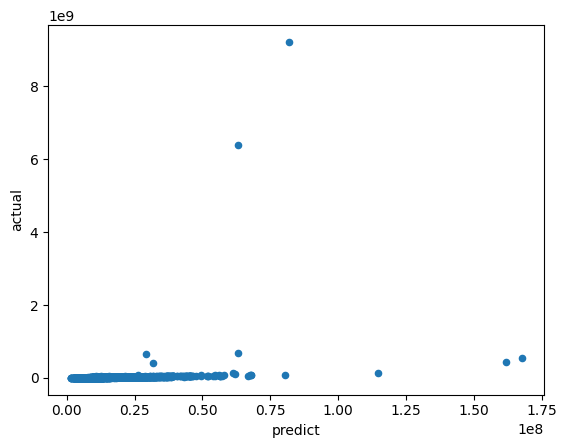

In [ ]:
results.plot.scatter(x='predict', y='actual')

['model.joblib']

In [ ]:
result = [(name, value) for value, name in zip(clf.feature_importances_, X.columns)]

In [ ]:
X.columns

Index(['floor_', 'floors', 'area', 'lat', 'lng', 'is_new', 'dist_to_station',
       'updated', 'closest_station_Автово', 'closest_station_Адмиралтейская',
       'closest_station_Академическая', 'closest_station_Балтийская',
       'closest_station_Беговая', 'closest_station_Бухарестская',
       'closest_station_Василеостровская', 'closest_station_Владимирская',
       'closest_station_Волковская', 'closest_station_Выборгская',
       'closest_station_Горьковская', 'closest_station_Гостиный двор',
       'closest_station_Гражданский проспект', 'closest_station_Девяткино',
       'closest_station_Достоевская', 'closest_station_Дунайская',
       'closest_station_Елизаровская', 'closest_station_Звёздная',
       'closest_station_Зенит', 'closest_station_Кировский завод',
       'closest_station_Комендантский проспект',
       'closest_station_Крестовский остров', 'closest_station_Купчино',
       'closest_station_Ладожская', 'closest_station_Ленинский проспект',
       'closest_station

In [ ]:
sorted(result, key=lambda x: x[1], reverse=True)

[('area', 0.26514526865229704),
 ('dist_to_station', 0.25192595041343785),
 ('updated', 0.19283720645879782),
 ('lng', 0.09768912696224091),
 ('lat', 0.05699849505451972),
 ('floors', 0.04243660224798627),
 ('closest_station_Ломоносовская', 0.030667282184325264),
 ('closest_station_Крестовский остров', 0.00991378907509579),
 ('closest_station_Ладожская', 0.008942881250433011),
 ('floor_', 0.00860589579023995),
 ('closest_station_Площадь Восстания', 0.006049414230454996),
 ('address_type_ул.', 0.00532986629951133),
 ('rooms_2', 0.0046526139703002385),
 ('address_type_другое', 0.003328307495219064),
 ('address_type_просп.', 0.002662635355277114),
 ('rooms_3', 0.0021615522343238582),
 ('rooms_1', 0.001734688303931433),
 ('closest_station_Улица Дыбенко', 0.0017151559188126257),
 ('address_type_бул.', 0.0013148738321495544),
 ('closest_station_Международная', 0.0009554000998357797),
 ('closest_station_Приморская', 0.0009191361288969142),
 ('rooms_4+', 0.000618296535931195),
 ('closest_stati